In [3]:
import pandas as pd

data = pd.read_csv("D:/Code/New/AI_Course/data/titanic/Titanic-Dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.drop("Name", axis=1, inplace=True)

In [5]:
# selecting the quantitative columns from the data set
quantitative_cols = data.select_dtypes(include="number").columns.tolist()
quantitative_cols

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [6]:
# selecting the categorical columns from the data set
categorical_cols = data.select_dtypes(exclude="number").columns.tolist()
categorical_cols

['Sex', 'Ticket', 'Cabin', 'Embarked']

In [7]:
from sklearn.impute import SimpleImputer

# Handle missing values for quantitative and categorical columns
imputer_quantitative = SimpleImputer(strategy="mean")
data[quantitative_cols] = imputer_quantitative.fit_transform(data[quantitative_cols])

imputer_categorical = SimpleImputer(strategy="most_frequent")
data[categorical_cols] = imputer_categorical.fit_transform(data[categorical_cols])

data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,3.0,male,22.0,1.0,0.0,A/5 21171,7.2500,B96 B98,S
1,2.0,1.0,1.0,female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
2,3.0,1.0,3.0,female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,B96 B98,S
3,4.0,1.0,1.0,female,35.0,1.0,0.0,113803,53.1000,C123,S
4,5.0,0.0,3.0,male,35.0,0.0,0.0,373450,8.0500,B96 B98,S


In [8]:
# encoding the categorical columns from the data set
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,3.0,1,22.0,1.0,0.0,523,7.2500,47,2
1,2.0,1.0,1.0,0,38.0,1.0,0.0,596,71.2833,81,0
2,3.0,1.0,3.0,0,26.0,0.0,0.0,669,7.9250,47,2
3,4.0,1.0,1.0,0,35.0,1.0,0.0,49,53.1000,55,2
4,5.0,0.0,3.0,1,35.0,0.0,0.0,472,8.0500,47,2


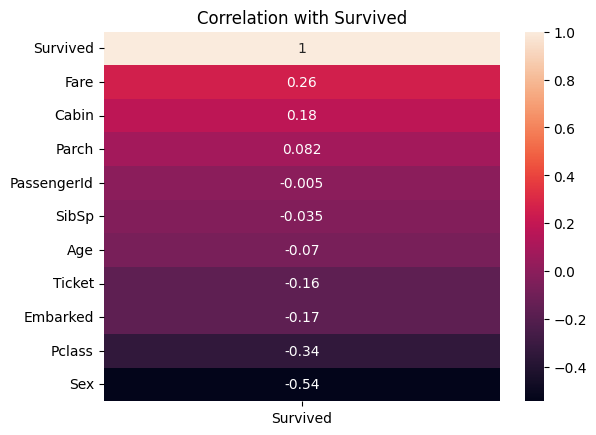

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = data.corr()
labeled_corr = corr_matrix[["Survived"]].sort_values(by="Survived", ascending=False)
sns.heatmap(labeled_corr, annot=True)
plt.title("Correlation with Survived")
plt.show()

In [10]:
data.drop(["PassengerId","Parch", "SibSp", "Age"], axis=1, inplace=True)

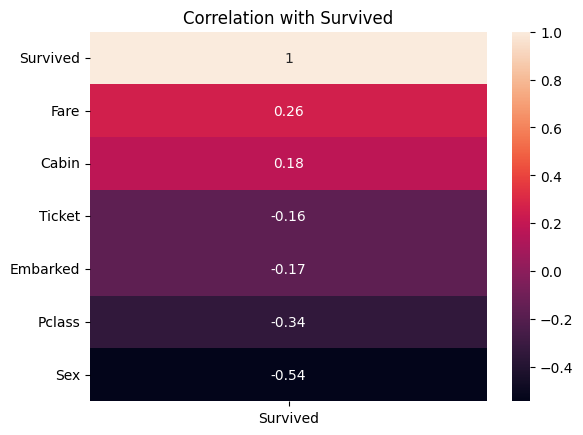

In [11]:
corr_matrix = data.corr()
labeled_corr = corr_matrix[["Survived"]].sort_values(by="Survived", ascending=False)
sns.heatmap(labeled_corr, annot=True)
plt.title("Correlation with Survived")
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

features = data.drop("Survived", axis=1, inplace=False)
labels = data["Survived"]

feature_train, feature_test, label_train, label_test = train_test_split(
    features, labels, test_size=0.2, random_state=41, shuffle=True
)

# Display the shapes of the resulting datasets
print("Training features shape:", feature_train.shape)
print("Testing features shape:", feature_test.shape)
print("Training labels shape:", label_train.shape)
print("Testing labels shape:", label_test.shape)

Training features shape: (712, 6)
Testing features shape: (179, 6)
Training labels shape: (712,)
Testing labels shape: (179,)


In [13]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

# Assuming 'feature_train', 'feature_test', 'label_train', and 'label_test' are already defined
# Initialize and train the model
model = LogisticRegression(max_iter=500)
model.fit(feature_train, label_train)

# Make predictions on the test set
label_pred = model.predict(feature_test)

# Calculate accuracy
accuracy = accuracy_score(label_test, label_pred) * 100
print("Accuracy:", accuracy)

# Generate classification report
class_report = classification_report(label_test, label_pred)
print("Classification Report:\n", class_report)

# Generate confusion matrix
conf_matrix = confusion_matrix(label_test, label_pred)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 84.35754189944134
Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.91      0.87       105
         1.0       0.86      0.74      0.80        74

    accuracy                           0.84       179
   macro avg       0.85      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179

Confusion Matrix:
 [[96  9]
 [19 55]]
